In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
iowa_train = pd.read_csv("houseTrain.csv") 
iowa_test = pd.read_csv("houseTest.csv")

iowa_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


A short statistical description of the data set is output above. I will look at it to get a better idea of the training dataset that I am working with. For example there are 1460 houses in this dataset. There are some missing variables for some entries such as LotFrontage, and MasVnrArea. The mean SalePrice of homes were $180,921 and the std dev was nearly 80k.The majority of the houses stay around 163k. The range of YearBuilt looks wide

In [3]:
iowa_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
iowa_train.isnull().sum().sum()
iowa_train.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [5]:
iowa_train.dropna(axis=0)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [6]:
iowa_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
iowa_train.OverallQual.describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

In [8]:
iowa_train['GarageCars'].describe()

count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64

In [9]:
iowa_train.GrLivArea.describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

Experiment 1

I will begin by making a new training data frame using just the columns from the original training set that I think would be good in my model 

In [10]:
Ex1df = iowa_train[['GrLivArea', 'GarageCars', 'OverallQual', 'SalePrice']]

Correlations with graphic below

<AxesSubplot:>

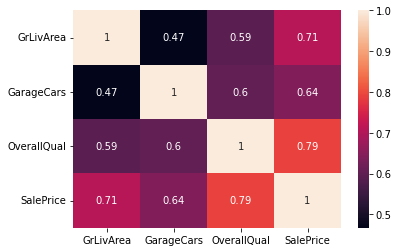

In [11]:
corr = Ex1df.corr() # allows us to get the correlations
sns.heatmap(corr, annot=True) # annot=True adds the values

THey look well correlated maybe more visual should go here below for individual features but undecided on which would be good ones. 


Pre processing

In [12]:
Ex1df.isna().sum()

GrLivArea      0
GarageCars     0
OverallQual    0
SalePrice      0
dtype: int64

Model

In [13]:
lin_reg = linear_model.LinearRegression()

In [14]:
x = Ex1df[['GrLivArea', 'GarageCars', 'OverallQual']]

In [15]:
y = np.log(Ex1df['SalePrice'])

In [16]:
lin_reg.fit(x,y)

LinearRegression()

In [17]:
print('Coefficients: \n', lin_reg.coef_)
print('Intercept: \n', lin_reg.intercept_)

Coefficients: 
 [0.00022158 0.13162094 0.14338043]
Intercept: 
 10.581139334718419


In [18]:
iowa_test=pd.read_csv('houseTest.csv')
Ex1Test = iowa_test[['GrLivArea', 'GarageCars', 'OverallQual']]

In [19]:
Ex1Test.isnull().sum()

GrLivArea      0
GarageCars     1
OverallQual    0
dtype: int64

In [20]:
Ex1Test['GarageCars'] = Ex1Test['GarageCars'].fillna(0)

C:\Users\sydne\AppData\Local\Temp/ipykernel_14420/4245284800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ex1Test['GarageCars'] = Ex1Test['GarageCars'].fillna(0)


In [21]:
y_pred = lin_reg.predict(Ex1Test)

In [22]:
Ex1df.index

RangeIndex(start=0, stop=1460, step=1)

In [23]:
y_pred_df = pd.DataFrame()
y_pred_df['Id'] = iowa_test['Id']
y_pred_df.head()

,Id
0,1461
1,1462
2,1463
3,1464
4,1465


In [24]:
y_pred_df['SalePrice'] = np.exp(y_pred)
y_pred_df.head()

,Id,SalePrice
0,1461,112218.085323
1,1462,142560.915920
2,1463,150578.471452
3,1464,172832.902141
4,1465,214282.169052


RMSE evaluation  = Score: 0.19019

In [25]:
y_pred_df.to_csv('Experiment1_Preds3.csv', index=False)

Experiment 2

In [64]:
Ex2df = iowa_train[['TotRmsAbvGrd', '3SsnPorch', 'OverallQual', 'SalePrice']]

<AxesSubplot:>

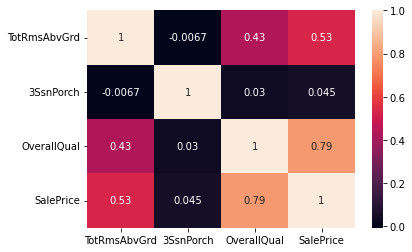

In [65]:
corr = Ex2df.corr() # allows us to get the correlations
sns.heatmap(corr, annot=True) # annot=True adds the values

Ex2df = iowa_train[['PoolArea', 'BsmtFinSF1', 'OverallQual', 'SalePrice']] None of these above look like good choices, based on the correlation matrix. PoolArea was the worst so I'm definilty picking something else for that. I'm going to pick some different ones and re run it but am not going to show the code for each pick until I decide on one.

In [42]:
iowa_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [66]:
lin_reg2 = linear_model.LinearRegression()

In [68]:
x = Ex2df[['TotRmsAbvGrd', '3SsnPorch', 'OverallQual']]
y = np.log(Ex2df['SalePrice'])

In [69]:
lin_reg2.fit(x,y)

LinearRegression()

In [70]:
print('Coefficients: \n', lin_reg2.coef_)
print('Intercept: \n', lin_reg2.intercept_)

Coefficients: 
 [0.05586844 0.00047121 0.20765786]
Intercept: 
 10.391733732356329


In [71]:
Ex2Test = iowa_test[['TotRmsAbvGrd', '3SsnPorch', 'OverallQual']]

In [73]:
y_pred2 = lin_reg2.predict(Ex2Test)

In [74]:
y_pred_df2 = pd.DataFrame()
y_pred_df2['Id'] = iowa_test['Id']
y_pred_df2['SalePrice'] = np.exp(y_pred2)
y_pred_df2.head()

,Id,SalePrice
0,1461,121706.203819
1,1462,158402.027529
2,1463,128699.266767
3,1464,167503.579584
4,1465,226916.829622


In [75]:
y_pred_df2.to_csv('Experiment2_Preds.csv', index=False)

RMSE Score: 0.21710

I new this one would be worse than my first based off the correlation of the features I picked but some of the features I wanted to use for this experiment were not showing when I selected them. I'm guessing the features that won't show for me are not in the right format or have something missing.

Experiment 3